<a href="https://colab.research.google.com/github/MunSu2001/File/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import weibull_min, lognorm, expon, gamma
from scipy.optimize import minimize
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats


In [3]:
df = pd.read_csv("SDSC-Par-1996-3.1-cln.swf", comment=';' ,sep=r"\s+", skipinitialspace=True,
                        names = ['Job Number','Submit Time','Wait Time','Run Time','Number of Allocated Processors','Average CPU Time Used','Used Memory',
                                 'Requested Number of Processors','Requested Time','Requested Memory','Status','User ID','Group ID',
                                 'Executable (Application) Number','Queue Number','Partition Number','Preceding Job Number','Think Time from Preceding Job'])

df

,Job Number,Submit Time,Wait Time,Run Time,Number of Allocated Processors,Average CPU Time Used,Used Memory,Requested Number of Processors,Requested Time,Requested Memory,Status,User ID,Group ID,Executable (Application) Number,Queue Number,Partition Number,Preceding Job Number,Think Time from Preceding Job
0,1,0,392395,19025,64,19025.0,-1,-1,-1,-1,1,4,-1,-1,23,2,-1,-1
1,2,172211,562446,43328,128,43234.0,-1,-1,-1,-1,1,4,-1,-1,25,2,-1,-1
2,3,251072,526923,34361,128,34327.0,-1,-1,-1,-1,1,12,-1,-1,25,2,-1,-1
3,4,253225,559170,37372,128,37323.0,-1,-1,-1,-1,1,12,-1,-1,25,2,-1,-1
4,5,253392,596397,35202,128,35091.0,-1,-1,-1,-1,1,12,-1,-1,25,2,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,38715,32007751,-1,6891,16,6525.0,-1,-1,-1,-1,1,2,-1,-1,22,2,-1,-1
32131,38716,32009413,-1,5229,16,4864.0,-1,-1,-1,-1,1,3,-1,-1,22,2,-1,-1
32132,38717,32009712,-1,4930,4,4553.0,-1,-1,-1,-1,1,3,-1,-1,28,2,-1,-1
32133,38718,32009713,-1,4929,4,4551.0,-1,-1,-1,-1,1,3,-1,-1,28,2,-1,-1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Job Number                       32135 non-null  int64  
 1   Submit Time                      32135 non-null  int64  
 2   Wait Time                        32135 non-null  int64  
 3   Run Time                         32135 non-null  int64  
 4   Number of Allocated Processors   32135 non-null  int64  
 5   Average CPU Time Used            32135 non-null  float64
 6   Used Memory                      32135 non-null  int64  
 7   Requested Number of Processors   32135 non-null  int64  
 8   Requested Time                   32135 non-null  int64  
 9   Requested Memory                 32135 non-null  int64  
 10  Status                           32135 non-null  int64  
 11  User ID                          32135 non-null  int64  
 12  Group ID          

In [5]:
rt = pd.to_numeric(df['Run Time'], errors='coerce')
rt

,Run Time
0,19025
1,43328
2,34361
3,37372
4,35202
...,...
32130,6891
32131,5229
32132,4930
32133,4929


In [6]:
nan_count = rt.isna().sum()
negative_count = (rt < 0).sum()
zero_count = (rt == 0).sum()
total = len(rt)

print(f"총 데이터 개수: {total}")
print(f"NaN 개수: {nan_count} ({nan_count/total*100:.2f}%)")
print(f"음수 개수: {negative_count} ({negative_count/total*100:.2f}%)")
print(f"0 값 개수: {zero_count}")

총 데이터 개수: 32135
NaN 개수: 0 (0.00%)
음수 개수: 0 (0.00%)
0 값 개수: 7


In [7]:
# 무한대 개수 확인
inf_count = np.isinf(rt).sum()

print(f"inf(무한대) 개수: {inf_count}")
print(f"전체 대비 비율: {inf_count/len(rt)*100:.6f}%")

inf(무한대) 개수: 0
전체 대비 비율: 0.000000%


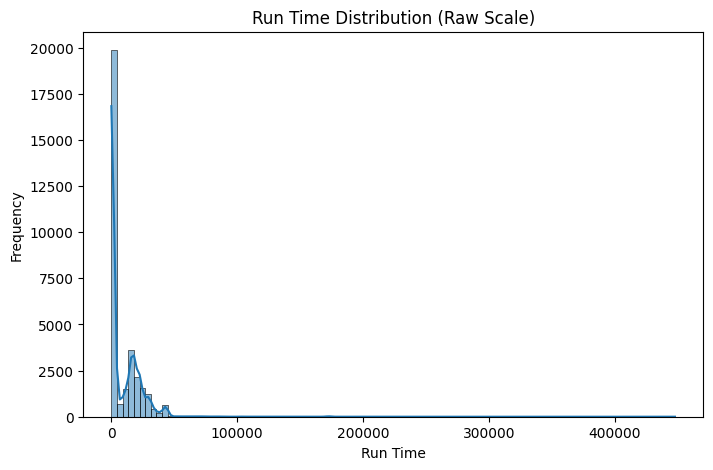

In [8]:
# Run Time 히스토그램
plt.figure(figsize=(8,5))
sns.histplot(rt, bins=100, kde=True)
plt.title("Run Time Distribution (Raw Scale)")
plt.xlabel("Run Time")
plt.ylabel("Frequency")
plt.show()

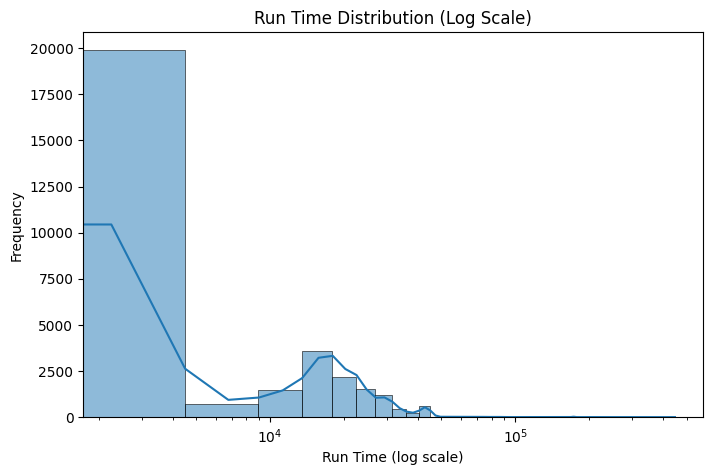

In [9]:
# 로그 스케일
plt.figure(figsize=(8,5))
sns.histplot(rt, bins=100, kde=True)
plt.xscale('log')
plt.title("Run Time Distribution (Log Scale)")
plt.xlabel("Run Time (log scale)")
plt.ylabel("Frequency")
plt.show()

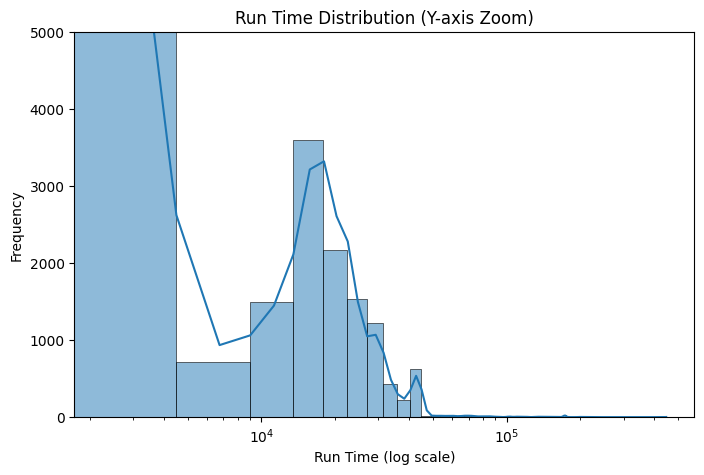

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(rt, bins=100, kde=True)
plt.xscale('log')

# 🔥 y축 범위만 제한 (전체 x축 유지)
plt.ylim(0, 5000)

plt.title("Run Time Distribution (Y-axis Zoom)")
plt.xlabel("Run Time (log scale)")
plt.ylabel("Frequency")
plt.show()

In [11]:
print(f"데이터 개수: {len(rt)}")  # 32135개 충분히 큼 신뢰성 있음
print(f"평균: {rt.mean():.4f}")   # 평균 8753으로 중앙값 209보다 훨씬 큼
print(f"중앙값: {rt.median():.4f}")  # 대부분 값이 작음
print(f"왜도(skewness): {skew(rt):.4f}") # 오른쪽으로 긴 꼬리
print(f"첨도(kurtosis): {kurtosis(rt):.4f}")  #정규분포보다 훨씬 표쪽하고 꼬리 두꺼움

데이터 개수: 32135
평균: 8753.1879
중앙값: 209.0000
왜도(skewness): 7.7115
첨도(kurtosis): 129.2369


In [12]:
# 어떤 확률 분포로 가장 잘 설명되는가 를 통계적으로 확인하기 위한 절차
# rt는 지금 pandas로 numpy 배열로 바꿔줘야함 scipy.stats가 numpy 배열을 받기 떄문
x = rt.to_numpy()

# 숫자화 하기 혹시 모를 안정장치
x = np.array(pd.to_numeric(x, errors='coerce'), dtype=float)  # 문자열 Nan값으로 변경
x = x[np.isfinite(x)]  # 혹시 모를 무한대 제외
x = x[x > 0]  # 양수만 남기기
x = np.clip(x, 1e-12, None)

# 로그정규 적합 shape = 표준편차, scale = 평균의 지수 형태, floc=0 => loc를 0으로 고정 x>0을 보정하기 위해
shape_l, loc_l, scale_l = stats.lognorm.fit(x, floc=0)
# 감마/지수도 함께
k_g, loc_g, theta_g = stats.gamma.fit(x, floc=0)
loc_e, scale_e = stats.expon.fit(x, floc=0)

print("lognorm params  : shape(σ)=", shape_l, ", loc=", loc_l, ", scale(exp(μ))=", scale_l)
print("gamma params    : k=", k_g, ", loc=", loc_g, ", theta=", theta_g)
print("exponential mean:", scale_e)

lognorm params  : shape(σ)= 3.3546582931317173 , loc= 0 , scale(exp(μ))= 421.5572829160382
gamma params    : k= 0.23628676077814376 , loc= 0 , theta= 37052.83782008346
exponential mean: 8755.095026145418


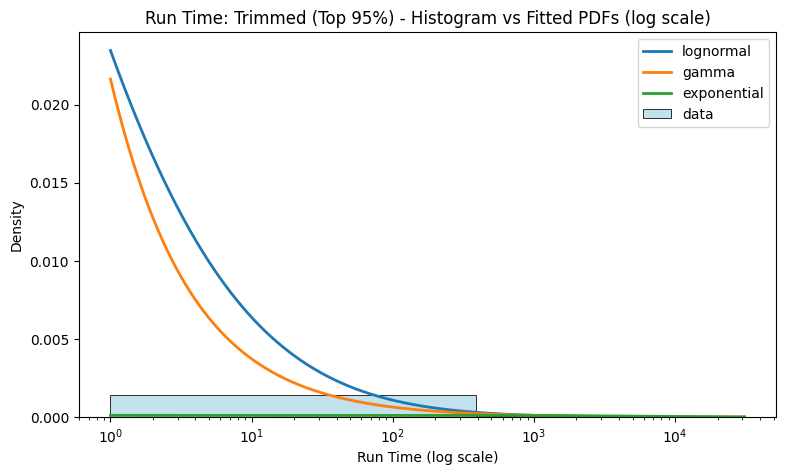

In [13]:
x_cut = x[x < np.percentile(x, 95)]  # 상위 95%까지만 시각화
xx = np.logspace(np.log10(x_cut.min()), np.log10(x_cut.max()), 1000)

plt.figure(figsize=(9,5))
sns.histplot(x_cut, bins=80, stat='density', color='lightblue', label='data')
plt.plot(xx, stats.lognorm.pdf(xx, shape_l, loc_l, scale_l), lw=2, label='lognormal')
plt.plot(xx, stats.gamma.pdf(xx, k_g, loc_g, theta_g), lw=2, label='gamma')
plt.plot(xx, stats.expon.pdf(xx, loc_e, scale_e), lw=2, label='exponential')

plt.xscale('log')
plt.title("Run Time: Trimmed (Top 95%) - Histogram vs Fitted PDFs (log scale)")
plt.xlabel("Run Time (log scale)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [14]:
ks_l = stats.kstest(x, stats.lognorm.cdf, args=(shape_l, loc_l, scale_l))
ks_g = stats.kstest(x, stats.gamma.cdf,   args=(k_g,     loc_g,  theta_g))
ks_e = stats.kstest(x, stats.expon.cdf,   args=(loc_e,   scale_e))

print("KS — lognormal:", ks_l)
print("KS — gamma    :", ks_g)
print("KS — exponential:", ks_e)

KS — lognormal: KstestResult(statistic=np.float64(0.17942446692025038), pvalue=np.float64(0.0), statistic_location=np.float64(9359.0), statistic_sign=np.int8(-1))
KS — gamma    : KstestResult(statistic=np.float64(0.1817991716685775), pvalue=np.float64(0.0), statistic_location=np.float64(120.0), statistic_sign=np.int8(1))
KS — exponential: KstestResult(statistic=np.float64(0.49015357177904334), pvalue=np.float64(0.0), statistic_location=np.float64(425.0), statistic_sign=np.int8(1))


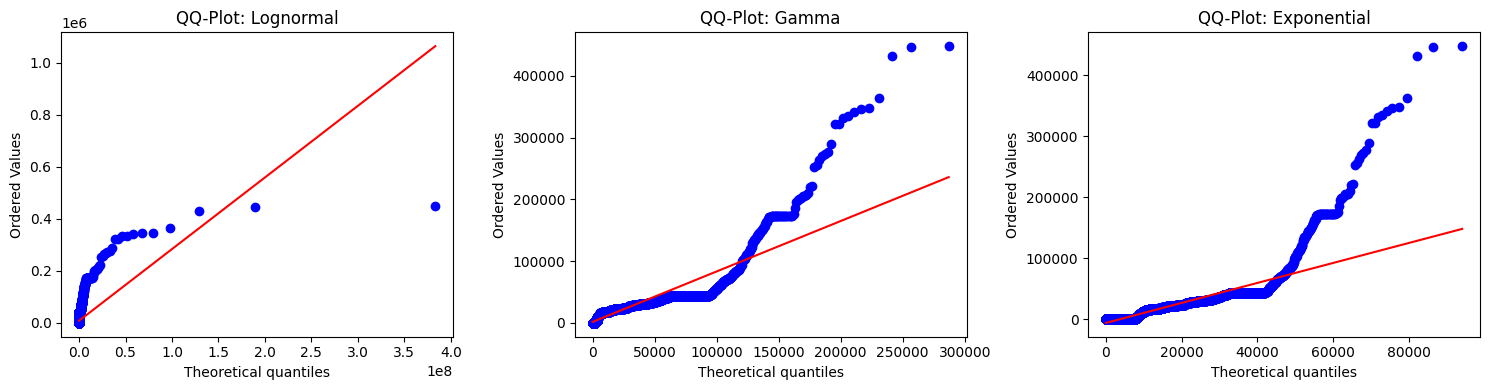

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# 1) 로그정규
stats.probplot(x, dist=stats.lognorm, sparams=(shape_l, loc_l, scale_l), plot=axs[0])
axs[0].set_title("QQ-Plot: Lognormal")

# 2) 감마
stats.probplot(x, dist=stats.gamma, sparams=(k_g, loc_g, theta_g), plot=axs[1])
axs[1].set_title("QQ-Plot: Gamma")

# 3) 지수
stats.probplot(x, dist=stats.expon, sparams=(loc_e, scale_e), plot=axs[2])
axs[2].set_title("QQ-Plot: Exponential")

plt.tight_layout()
plt.show()

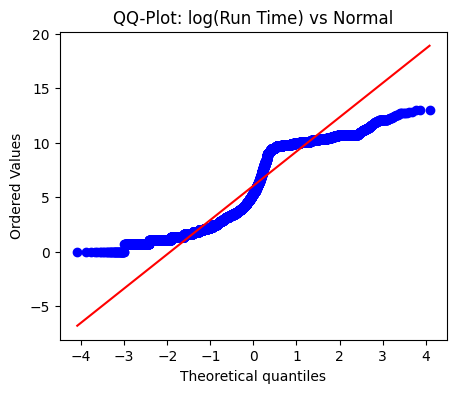

In [16]:
y = np.log(x)  # x = Run Time 양수 데이터

plt.figure(figsize=(5,4))
stats.probplot(y, dist="norm", plot=plt)
plt.title("QQ-Plot: log(Run Time) vs Normal")
plt.show()